### 분산분석
* 분산분석(ANOVA: Analysis of Variance): 명목척돌로 측정된 독립변수와 등간 또는 비율척도로 측정된 종속변수 사이의 관계를 3개 이상 집단간 평균의 차이로 검정할 때 사용
  - 집단간 평균 차이를 판단함에 있어 단순히 평균값의 차이를 비교하는 것은 정확한 비교가 어렵기 때문에, 집단간 분산과 집단 내 분산을 이용하여 여러 집단간 평균 차이를 판단한다고 하여 평균 차이를 검정함에도 불구하고 분산분석이라 함
* 분산분석의 종류: 독립변수와 종속변수의 수에 따라 일원분산분석, 이원분산분석(이상 단일변량분석), 다변량분산분석, 공분산분석
  - 일원분산분석(One-way ANOVA): 집단을 나누는 요인인 독립변수가 1개(단일요인), 종속변수도 1개일 때 집단간 종속변수의 평균 차이를 분석하는 방법
  - 이원분산분석(Two-way ANOVA: 독립변수는 2개, 종속변수는 1개일 때 집단간 종속변수의 평균 차이를 분석하는 방법
  - 다변량분산분석(MANOVA: Multivariate ANOVA): 종속변수가 2개 이상일 때 종속변수들가의 집단간 차이를 동시에 평가하는 방법
  - 공분산분석(ANCOVA: Analysis of Covariance): 일반적인 분산분석에서 종속변수에 영향을 줄 수 있는 연속형 외생변수의 효과를 제거하고, 순수하게 집단 간 종속변수의 평균 차이를 분석하는 방법
* 사후분석: 분산분석 후 구체적으로 어떤 집단이 어떤 집단과 유의한 차이를 보이는지 비교할 수 있는 방법
  - '각 집단의 평균은 동일하다.'라는 분산분석의 귀무가설에 대해 기각 여부와 관계없이 수행 가능
  - 분산분석의 귀무가설이 기각되지 않는 자료에 대해서 사후분석을 진행한 경우라고 하더라도 집단간의 모평균 차이는 존재할 수 있음
  - FIsher의 최소유의차(LSD, least significant difference), Tukey의 정직유의차(HSD, honestly significant difference), Scheffe 방법, Duncan 방법 등 있음
  - Fisher의 최소유의차: 등분산을 가정, 주로 귀무가설이 기각되는 경우에 사용하며 각 집단의 표본 크기가 다른 경우에도 적용이 가능하다는 장점이 있음
  - Tukey의 정직유의차: Fisher의 최소유의차 방법보다 더욱 엄격, 일반적으로 검정력이 떨어지기 때문에 보통 유의수준을 0.05가 아닌 0.1 이상의 큰 값으로 분석, 집단간 차이를 가장 정밀하게 감지할 수 있지만 집단별 표본 크기가 같은 경우에만 의미가 있음
  - Scheffe 방법: 일반적이고 융통성 있는 방법, 집단별 표본 크기가 다른 경우에도 사용이 가능하지만 필요이상으로 넓은 신뢰구간을 제시하는 단점이 있음
  - Duncan 방법: Fisher의 최소유의차와 마찬가지로 등분산을 가정, 1종 오류를 범할 가능성이 높다는 단점이 있음

#### 일원분산분석
* 가설검정을 위해 사용되는 검정통계량은 F값
* F값 $\rightarrow$ 집단내 분산 대비 집단간 분산이 몇 배 더 큰지를 나타내는 값
* F값이 F의 임계치보다 크다면 집단 간의 차이가 충분히 크다는 의미
* F검정 통계량을 구하기 위해서는 집단내 분산, 집단간 분산, 총분산을 알아야 함
  - 집단내 분산(SSW: Sum of Square Within Groups): 각 집단의 평균치를 중심으로 각 집단내의 자료들이 우연적인 오차에 의해 어떻게 흩어져 있는가를 요약하는 척도
  - 집단간 분산(SSB: Sum of Square Between Groups): 각 집단의 평균들이 전체 평균으로부터 흩어진 정도를 나타내는 척도
  - 총 분산(SST: Sum of Square Total): 각 자료들이 전체 평균으로부터 흩어진 정도를 나타내는 척도
* 분산의 정도는 각 자료가 평균으로부터 흩어진 정도뿐 아니라 자료의 수에도 영향을 받기 때문에 각 편차 제곱의 합을 자유도로 나눈 표준화 값인 제곱 합의 평균을 이용하여 F검정 통계량을 구함

#### 이원분산분석 (Two-way ANOVA)
* 2개의 요인(독립변수 2개)에 의한 집단간 종속변수의 평균 차이 비교를 할 때 사용하는 분석
* 일원분산분석의 원리와 해석방법과 동일, 그러나 독립변수의 수가 2개이기 때문에 독립변수들간의 상호작용 효과를 추가로 판단해야 함

#### 다변량분산분석 (MANOVA: Multivariate Analysis of Variance)
* 종속변수가 2개 이상인 경우 집단 간의 평균 차이를 비교하기 위한 분석 기법
* 집단 간 평균 뿐만 아니라 모집단에 대해 여러 상황을 제시하고 여러 개의 변수를 동시에 관찰하는 경우에도 유용
* 다변량분산분석의 종속변수 $\rightarrow$ 벡터변수, 다변량분산분석 $\rightarrow$ 모집단들의 종속변수에 의해 구성된 공간에서 평균이 같은지 조사
* 우선 종속변수가 2개이기 때문에 종속변수 사이에 상관관계가 존재하는지를 파악해야 함
  - 종속변수 간의 상관관계 없음 $\rightarrow$ 단일변량 분산분석으로 각각 분석을 진행
  - 종속변수 간의 상관관계 있음 $\rightarrow$ 다변량분산분석 진행
* 다변량 통계치
  - $Pillai's Trace$: 집단간분산 / 총분산 (값이 클수록 유의)
  - $Wilk's Lambda$:집단내분산 / 총분산 (값이 작을수록 유의)
  - $Hotteling's T^2$: 집단간분산 / 집단내분산 (값이 클수록 유의)

In [1]:
# 일원분산분석 실습
# A쇼핑 고객들의 구매유형별 총 매출액의 차이가 있는지를 일원분산분석을 통해 검정
# 귀무가설: A쇼핑 고객의 구매유형에 따른 총 매출액의 차이는 없다
# 연구가설: A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다

In [2]:
import pandas as pd
import numpy as np
import pingouin as pg
import scipy as sp
import scikit_posthocs # 사후분석용 패키지

C:\Users\starf\anaconda3\envs\Regular\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
df = pd.read_csv('Ashopping.csv',sep=',',encoding='CP949')
df1 = df[['구매유형','총_매출액']]
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리까지 설정

In [4]:
# 등분산 검정
구매유형 = []
for i in range(1,5,1):
    구매유형.append(df1[df1.구매유형==i].총_매출액)

sp.stats.levene(구매유형[0], 구매유형[1], 구매유형[2], 구매유형[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [5]:
# Welch 일원분산분석
print(pg.welch_anova(dv='총_매출액', between='구매유형', data=df1)) # dv -> 종속변수, between -> 독립변수

# 사후분석
df1['구매유형'] = df1['구매유형'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1,val_col='총_매출액',group_col='구매유형')) #val_col -> 종속변수, group_col -> 독립변수

# 구매유형별 평균 총매출액
print(구매유형[0].mean(),구매유형[1].mean(),구매유형[2].mean(),구매유형[3].mean())

  Source  ddof1   ddof2      F  p-unc   np2
0   구매유형      3 230.936 88.238  0.000 0.193
      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
3403682.3255813955 9612645.078864353 11779839.652777778 4392794.395161291


<ipython-input-5-5a4bf642683c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['구매유형'] = df1['구매유형'].astype(str)


In [6]:
# 이원분산분석 실습
# 구매유형과 거주지역에 따라 고객들의 총 매출액이 다른지 검정
# 제1독립변수의 효과, 제2독립변수의 효과, 상호작용 효과에 대해 논하는 가설로 분리하여 설정
# 구매유형에 따른 매출액 차이 가설
  # 귀무가설: 구매유형에 따른 총 매출액의 차이는 없다.
  # 연구가설: 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.
# 거주지역에 따른 매출액 차이 가설
  # 귀무가설: 거주지역에 따른 총 매출액의 차이는 없다.
  # 연구가설: 적어도 1개의 거주지역이 다른 거주지역과 총 매출액 차이가 존재한다.
# 독립변수간 상호작용에 대한 가설
  # 귀무가설: 구매유형과 거주지역의 상호작용 효과는 없다.
  # 연구가설: 구매유형과 거주지역의 상호작용 효과는 있다..

In [7]:
df= pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')
df1 = df[['총_매출액','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

# 이원분산분석
print(pg.anova(dv = '총_매출액', between = ['구매유형','거주지역'], data = df1))

# 사후분석
df1['구매유형'] = df1['구매유형'].astype(str)
df1['거주지역'] = df1['거주지역'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col = '구매유형'))
print(scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col = '거주지역'))

# 구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1, index = '구매유형', columns = '거주지역', values = '총_매출액', aggfunc=np.mean)

        Source                    SS      DF                   MS      F  \
0         구매유형  6193823502579444.000   3.000 2064607834193148.000 62.781   
1         거주지역 16139576682269626.000   6.000 2689929447044937.500 81.796   
2  구매유형 * 거주지역  3867936213048931.000  18.000  214885345169385.062  6.534   
3     Residual 32096439113329672.000 976.000   32885695812837.777    NaN   

   p-unc   np2  
0  0.000 0.162  
1  0.000 0.335  
2  0.000 0.108  
3    NaN   NaN  
      4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000
      6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000


<ipython-input-7-a6d7a1fc1f65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['구매유형'] = df1['구매유형'].astype(str)
<ipython-input-7-a6d7a1fc1f65>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['거주지역'] = df1['거주지역'].astype(str)


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,NaN,NaN,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,NaN,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


In [8]:
# 결과해석
# 구매유형의 F값: 63.18, 거주지역의 F값: 81.80, 두 변수간의 상호작용 효과의 F값: 6.53
# 유의확률은 모두 0.01 이하
# 사후분석 결과: 구매유형은 구매유형(1)과 구매유형(4)를 제외한 나머지 유형 간의 총 매출액 차이가 유의, 
# 거주지역은 (3,6), (4,6), (5,6), (2,7), (3,7), (4,7), (5,7), (6,7) 그룹간의 총 매출액 차이가 유의
# -> 이원분산분석 결과 모든 귀무가설 기각, 연구가설 채택 = 매출액은 구매유형, 거주지역에 따라 달라진다고 볼 수 있고, 구매유형과 거주지역 간의 상호작용 효과 또한 유의하다.

In [9]:
# 다변량분산분석 실습
# 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정
  # 귀무가설: A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다.
  # 연구가설: A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다.
# 앞선 상관관계분석 실습에서 종속변수 (방문빈도, 총 매출액) 간의 유의한 상관관계가 존재하는 것으로 판명됨
# 그러므로 바로 다변량분산분석 진행

In [10]:
# 모듈 및 데이터 불러오기
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')
df1 = df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

In [11]:
# 다변량분산분석
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 + 거주지역', data=df1).mv_test())

# from_formula('종속변수1 + 종속변수2 + ... + 종속변수n ~ 독립변수1 + 독립변수2 + ... + 독립변수n', data=data1)의 형태
# mv_test(): 앞서 설정해놓은 다변량분산분석 가설 검정을 수행하여 통계량 산출

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [12]:
# 다변량분산분석 정체 모형의 적합성, 거주지역과 구매유형에 대한 각각의 다변량분산분석 모형의 결과 출력
# 모두 유의확률 0.01 이하로 모형 유의미

In [13]:
# 사후분석
df1['구매유형'] = df1['구매유형'].astype(str)
df1['거주지역'] = df1['거주지역'].astype(str)
print('\n 구매유형 총매출액 사후분석 \n', scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형'))
print('\n 거주지역 총매출액 사후분석 \n', scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역'))
print('\n 구매유형 방문빈도 사후분석 \n', scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형'))
print('\n 거주지역 방문빈도 사후분석 \n', scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역'))

# 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n', 평균총매출액)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n', 평균방문빈도)


 구매유형 총매출액 사후분석 
       4     2     1     3
4 1.000 0.000 0.805 0.000
2 0.000 1.000 0.000 0.008
1 0.805 0.000 1.000 0.000
3 0.000 0.008 0.000 1.000

 거주지역 총매출액 사후분석 
       6     4     5     7     3     2     1
6 1.000 0.008 0.002 0.000 0.019 0.339 0.988
4 0.008 1.000 1.000 0.000 0.978 0.980 1.000
5 0.002 1.000 1.000 0.000 0.935 0.965 1.000
7 0.000 0.000 0.000 1.000 0.000 0.000 0.412
3 0.019 0.978 0.935 0.000 1.000 1.000 1.000
2 0.339 0.980 0.965 0.000 1.000 1.000 1.000
1 0.988 1.000 1.000 0.412 1.000 1.000 1.000

 구매유형 방문빈도 사후분석 
       4     2     1     3
4 1.000 0.000 0.030 0.998
2 0.000 1.000 0.000 0.000
1 0.030 0.000 1.000 0.075
3 0.998 0.000 0.075 1.000

 거주지역 방문빈도 사후분석 
       6     4     5     7     3     2     1
6 1.000 0.000 0.000 0.000 0.000 0.005 0.451
4 0.000 1.000 0.913 0.000 0.370 0.604 0.949
5 0.000 0.913 1.000 0.000 0.040 0.303 0.878
7 0.000 0.000 0.000 1.000 0.000 0.000 0.018
3 0.000 0.370 0.040 0.000 1.000 0.999 1.000
2 0.005 0.604 0.303 0.000 0.999 1.000 1.000
1 0.

<ipython-input-13-0d3223e679dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['구매유형'] = df1['구매유형'].astype(str)
<ipython-input-13-0d3223e679dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['거주지역'] = df1['거주지역'].astype(str)


In [14]:
# 구매유형 기준으로 구매유형(1)과 구매유형(4)를 제외한 나머지 유형 간의 총매출액 차이가 유의하고,
# 거주지역 기준으로 그룹 (3,6), (4,6), (5,6), (2,7), (3,7), (4,7), (5,7), (6,7) 그룹간의 총매출액 차이가 유의하게 나타남
# 구매유형 기준으로 구매유형(1)과 구매유형(3), 구매유형(3)과 구매유형(4)를 제외한 나머지 유형 간의 방문빈도 차이 유의하고,
# 거주지역 기준으로 그룹 (3,5), (2,6), (3,6), (4,6), (5,6), (1,7), (2,7), (3,7), (4,7), (5,7), (6,7) 그룹간의 방문빈도 차이가 유의하게 나타남

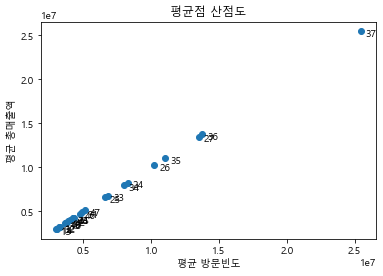

In [15]:
# 두 개의 독립변수로 구성된 28개 세부 그룹에 대한 평균총매출액과 평균방문빈도를 그래프에 나타내기 (평균점 산점도)
import matplotlib
import matplotlib.pyplot as plt

X = np.hstack(평균방문빈도.values[0:4]) 
Y = np.hstack(평균총매출액.values[0:4])

matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 평균점 산점도 그리기
labels = []
for i in range(1,5,1):
    for j in range(1,8,1):
        labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels, X, Y): # zip(): 동일한 길이의 여러 객체에 대해 같은 인덱스에 해당하는 값들을 묶어 하나의 리스트로 반환
    plt.annotate(label,  # 출력될 텍스트 객체 (label)
                              xycoords = 'data', # x와 y축의 좌표체계 (평균방문빈도와 평균총매출액)
                              textcoords= 'offset points', # 주석이 찍히는 좌표체계 (좌표평면 상에서 포인트 단위로 처리)
                              xy = (x_count, y_count), # 매 반복별 텍스트가 찍힐 x, y의 좌표
                              xytext= (5,-5)) # 실제 위치에서 +5, _5 떨어지도록 설정

# annotate(text, xycoords, textcoords, xy, xytest)
    
plt.title('평균점 산점도')
plt.xlabel('평균 방문빈도')
plt.ylabel('평균 총매출액')
plt.plot(X, Y, 'o')